# Data Analysis
**Some information about the data**

In [1]:
from pyimzml.ImzMLParser import ImzMLParser

p = ImzMLParser('Cancer.imzml')
my_spectra = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    my_spectra.append([mzs, intensities, (x, y, z)])

In [7]:
# Min of max  recorded mzs and intensities
max_mz = -float('inf')
max_intensity = -float('inf')
min_mz = float('inf')
min_intensity = float('inf')
for spectrum in my_spectra:
    max_mz = max(max(spectrum[0]),max_mz)
    min_mz = min(min(spectrum[0]),min_mz)
    max_intensity = max(max(spectrum[1]),max_intensity)
    min_intensity = min(min(spectrum[1]),min_intensity)

print(f'Range of mz values:',(min_mz,max_mz))
print(f'Range of intensities values:',(min_intensity,max_intensity))
print(f'Number of spectrum:',len(my_spectra))



Range of mz values: (100.00021, 1499.9867)
Range of intensities values: (457.20508, 6927808.0)
Number of spectrum: 160000


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Creating histogram to see the distribution of recorded m/z values
# For a given tolerance

tolerance = 0.1
target_mz = 146

# I want to capture all the pixels
# What i want to do is to go through the spectrums mz array add to the count if there is one mz value in the proposed range
histogram_data = np.array([[0,0]])

for mz in range(100,1500,100):
    count = 0
    for mzs,_,_ in my_spectra:
        mz_mask = (mzs >= mz - tolerance) & (mzs <= mz + tolerance)
        if np.any(mz_mask):
            count += 1
            # go to next spectrum
            continue
    data = np.array([[mz, count]])
    histogram_data = np.vstack([histogram_data, data])
print(histogram_data)
    # plt.hist()



[[    0     0]
 [  100 95204]
 [  200 45389]
 [  300 10740]
 [  400 32035]
 [  500 14063]
 [  600  7877]
 [  700 39646]
 [  800  5261]
 [  900   269]
 [ 1000   565]
 [ 1100   949]
 [ 1200   297]
 [ 1300   203]
 [ 1400   165]]


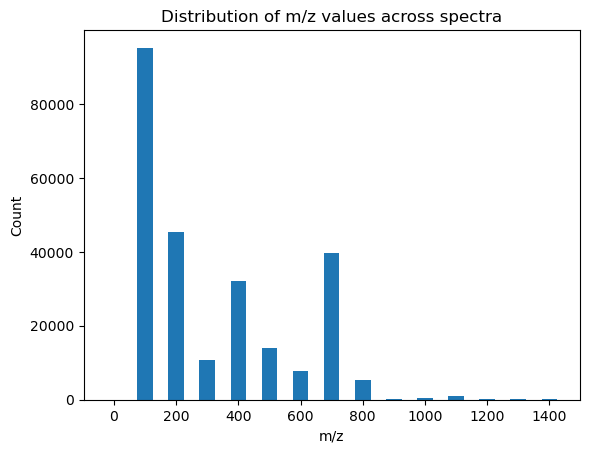

In [50]:
plt.bar(histogram_data[:,0], histogram_data[:,1],width=50)
plt.xlabel('m/z')
plt.ylabel('Count')
plt.title('Distribution of m/z values across spectra')
plt.show()